In [ ]:
!pip install opencv-python

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [21]:
from glob import glob
from PIL import Image
from numpy import asarray

In [22]:
import os
path = os.listdir('/home/rishav/Brain Tumor Detection/Brain Tumor Data')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [23]:
no_tumor_frompath= '/home/rishav/Brain Tumor Detection/Brain Tumor Data/Training/no_tumor'
no_tumor_topath = '/home/rishav/Brain Tumor Detection/Brain Tumor Data/Agumented_Data/Training/no_tumor/'
no_tumor_images=glob(no_tumor_frompath+'/*')
c=0
for path in no_tumor_images:
  img=Image.open(path)
  img=img.resize((224,224))
  img.save(no_tumor_topath+str(c)+'.jpg')
  c+=1
  mirimg=img.transpose(Image.FLIP_LEFT_RIGHT)
  mirimg.save(no_tumor_topath+str(c)+'.jpg')
  c+=1
  rotimg=img.rotate(90,Image.NEAREST, expand = 1)
  rotimg.save(no_tumor_topath+str(c)+'.jpg')
  c+=1
  mirrotimg=rotimg.transpose(Image.FLIP_LEFT_RIGHT)
  mirrotimg.save(no_tumor_topath+str(c)+'.jpg')
  c+=1

/tmp/ipykernel_16159/731841807.py:10: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  mirimg=img.transpose(Image.FLIP_LEFT_RIGHT)
/tmp/ipykernel_16159/731841807.py:13: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rotimg=img.rotate(90,Image.NEAREST, expand = 1)
/tmp/ipykernel_16159/731841807.py:16: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  mirrotimg=rotimg.transpose(Image.FLIP_LEFT_RIGHT)


In [24]:
frompath = '/home/rishav/Brain Tumor Detection/Brain Tumor Data/Training/pituitary_tumor'
topath = '/home/rishav/Brain Tumor Detection/Brain Tumor Data/Agumented_Data/Training/pituitary_tumor/'
images=glob(frompath+'/*')
c=0
for path in images:
  img=Image.open(path)
  img=img.resize((224,224))
  img.save(topath+str(c)+'.jpg')
  c+=1
  mirimg=img.transpose(Image.FLIP_LEFT_RIGHT)
  mirimg.save(topath+str(c)+'.jpg')
  c+=1
  rotimg=img.rotate(90,Image.NEAREST, expand = 1)
  rotimg.save(topath+str(c)+'.jpg')
  c+=1
  mirrotimg=rotimg.transpose(Image.FLIP_LEFT_RIGHT)
  mirrotimg.save(topath+str(c)+'.jpg')
  c+=1

/tmp/ipykernel_16159/3137970955.py:10: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  mirimg=img.transpose(Image.FLIP_LEFT_RIGHT)
/tmp/ipykernel_16159/3137970955.py:13: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rotimg=img.rotate(90,Image.NEAREST, expand = 1)
/tmp/ipykernel_16159/3137970955.py:16: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  mirrotimg=rotimg.transpose(Image.FLIP_LEFT_RIGHT)


In [25]:
import cv2
X=[]
Y=[]
for cls in classes:
  pth = '/home/rishav/Brain Tumor Detection/Brain Tumor Data/Agumented_Data/Training/'+cls
  for j in os.listdir(pth):
    img = cv2.imread(pth+'/'+j)   
    # img = cv2.resize(img,dsize=(224,224))
    X.append(img)
    Y.append(classes[cls])

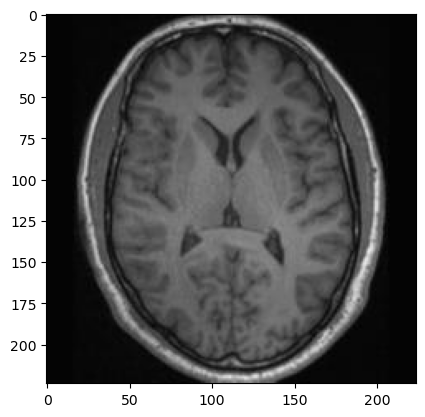

In [26]:
plt.imshow(X[0],cmap='gray')

In [27]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=10,test_size=0.20)
print ("Shape of an image in x_train: ", x_train[0].shape)
print ("Shape of an image in x_test: ", x_test[0].shape)

Shape of an image in x_train:  (224, 224, 3)
Shape of an image in x_test:  (224, 224, 3)


In [28]:
from sklearn import preprocessing
import tensorflow as tf
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
x_train = np.array(x_train)
y_test = np.array(y_test)
x_test = np.array(x_test) 
print("x_train Shape: ", x_train.shape) 
print("x_test Shape: ", x_test.shape)
print("y_train Shape: ", y_train.shape) 
print("y_test Shape: ", y_test.shape)

x_train Shape:  (3910, 224, 224, 3)
x_test Shape:  (978, 224, 224, 3)
y_train Shape:  (3910, 2)
y_test Shape:  (978, 2)


In [29]:
from keras.applications import vgg16

img_rows,img_cols=224,224

vgg=vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(img_rows,img_cols,3))

In [30]:
for layer in vgg.layers:
  layer.trainable=False


In [31]:
from keras.layers.pooling.global_average_pooling2d import GlobalAveragePooling2D
def lw(bottom_model,num_classes):
  top_model=bottom_model.output
  top_model=GlobalAveragePooling2D()(top_model)
  top_model=Dense(1024,activation='relu')(top_model)
  top_model=Dense(1024,activation='relu')(top_model)
  top_model=Dense(512,activation='relu')(top_model)
  top_model=Dense(num_classes,activation='softmax')(top_model)
  return top_model

In [32]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,GlobalAveragePooling2D
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D
from keras.models import Model

In [33]:
num_classes=2
FC_Head=lw(vgg,num_classes)
model=Model(inputs=vgg.input,outputs=FC_Head)
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [34]:
from tensorflow.keras.models import Model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [35]:
history=model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test),verbose=1,initial_epoch=0)

Epoch 1/5


2023-02-19 21:11:56.890737: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 588564480 exceeds 10% of free system memory.
2023-02-19 21:11:57.885893: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.
2023-02-19 21:11:58.029196: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.



  1/123 [..............................] - ETA: 11:39 - loss: 0.7274 - accuracy: 0.5625

2023-02-19 21:12:02.935351: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.
2023-02-19 21:12:03.042368: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.


123/123 [==============================] - 880s 7s/step - loss: 0.4450 - accuracy: 0.9253 - val_loss: 0.0380 - val_accuracy: 0.9857
Epoch 2/5
123/123 [==============================] - 903s 7s/step - loss: 0.0548 - accuracy: 0.9798 - val_loss: 0.0400 - val_accuracy: 0.9826
Epoch 3/5
123/123 [==============================] - 857s 7s/step - loss: 0.0235 - accuracy: 0.9934 - val_loss: 0.0209 - val_accuracy: 0.9928
Epoch 4/5
123/123 [==============================] - 882s 7s/step - loss: 0.0231 - accuracy: 0.9931 - val_loss: 0.0476 - val_accuracy: 0.9847
Epoch 5/5
123/123 [==============================] - 1010s 8s/step - loss: 0.0188 - accuracy: 0.9944 - val_loss: 0.0113 - val_accuracy: 0.9949


In [41]:
import pickle

In [42]:
filename= 'brai_tumor_model.pkl'
pickle.dump(model,open(filename,'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_10
.........vars
............0
............1
......conv2d_11
.........vars
............0
............1
......conv2d_12
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......conv2d_3
.........vars
............0
............1
......conv2d_4
.........vars
............0
............1
......conv2d_5
.........vars
............0
............1
......conv2d_6
.........vars
............0
............1
......conv2d_7
.........vars
............0
............1
......conv2d_8
.........vars
............0
............1
......conv2d_9
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
..

In [43]:
load_model = pickle.load(open(filename,'rb'))
load_model.predict(x_test)

Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-02-19 22:48:02     84145360
config.json                                    2023-02-19 22:48:02        12556
metadata.json                                  2023-02-19 22:48:02           64
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_10
.........vars
............0
............1
......conv2d_11
.........vars
............0
............1
......conv2d_12
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......conv2d_3
.........vars
............0
............1
......conv2d_4
.........vars
............0
............1
......conv2d_5
.........vars
............0
............1
......conv2d_6
.........vars
............0
............1
....

array([[9.9999994e-01, 8.3234142e-10],
       [4.8309003e-06, 9.9999505e-01],
       [9.9999994e-01, 1.6124417e-21],
       ...,
       [5.2293788e-05, 9.9994761e-01],
       [2.3197440e-06, 9.9999774e-01],
       [4.5827742e-06, 9.9999547e-01]], dtype=float32)

31/31 [==============================] - 214s 7s/step


array([[9.9999994e-01, 8.3234142e-10],
       [4.8309003e-06, 9.9999505e-01],
       [9.9999994e-01, 1.6124417e-21],
       ...,
       [5.2293788e-05, 9.9994761e-01],
       [2.3197440e-06, 9.9999774e-01],
       [4.5827742e-06, 9.9999547e-01]], dtype=float32)

In [37]:
dec= {0: 'No Tumor', 1:'Positive Tumor'}

1/1 [==============================] - 4s 4s/step


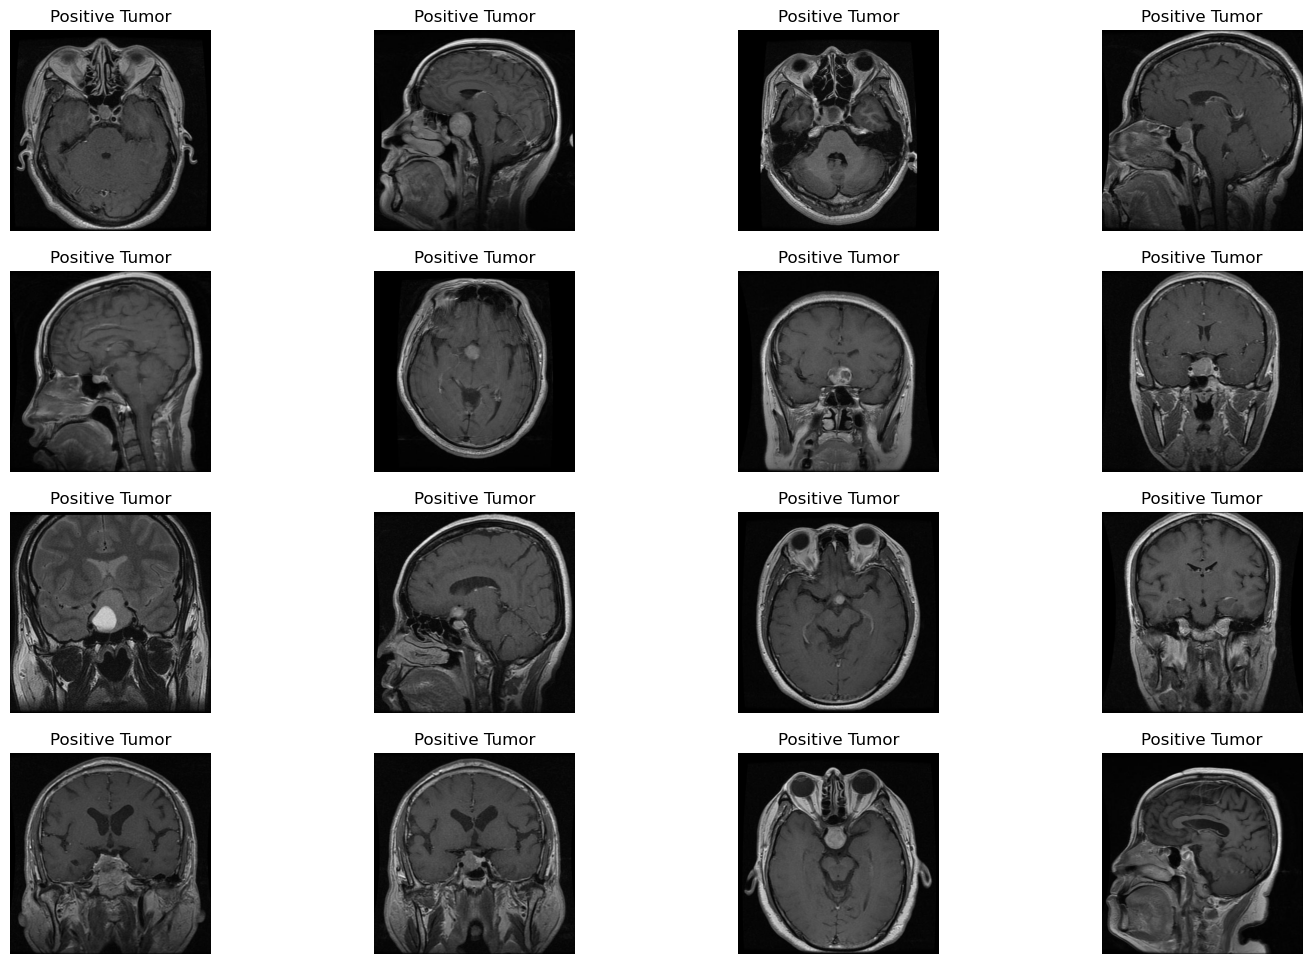

In [45]:
plt.figure(figsize=(18,12))
p=os.listdir('/home/rishav/Brain Tumor Detection/Brain Tumor Data/Training/pituitary_tumor')
c=1
predict_img=[]
for i in os.listdir('/home/rishav/Brain Tumor Detection/Brain Tumor Data/Training/pituitary_tumor/')[:16]:
  plt.subplot(4,4,c)

  img=cv2.imread('/home/rishav/Brain Tumor Detection/Brain Tumor Data/Training/pituitary_tumor/'+i)
  img1 = cv2.resize(img,(224,224))
  predict_img.append(img1)
  p= load_model.predict(np.array(predict_img))
  result = np.argmax(p, axis =1)
  plt.title(dec[result[c-1]])
  plt.imshow(img,cmap='gray')
  plt.axis('off')
  c+=1

In [2]:
plt.figure(figsize=(18,12))
p=os.listdir('/home/rishav/Brain Tumor Detection/Brain Tumor Data/Training/no_tumor')
c=1
predict_img=[]
for i in os.listdir('/home/rishav/Brain Tumor Detection/Brain Tumor Data/Training/no_tumor/')[:16]:
  plt.subplot(4,4,c)

  img=cv2.imread('/home/rishav/Brain Tumor Detection/Brain Tumor Data/Training/no_tumor/'+i)
  img1 = cv2.resize(img,(224,224))
  predict_img.append(img1)
  p= model.predict(np.array(predict_img))
  result = np.argmax(p, axis =1)
  plt.title(dec[result[c-1]])
  plt.imshow(img,cmap='gray')
  plt.axis('off')
  c+=1

NameError: name 'plt' is not defined

In [ ]:
model.save('brain_tumor_detection.h5')

In [35]:
import tensorflowjs as tfjs

In [42]:
tfjs.converters.save_keras_model(model,'./tfjs_files')